# Global Temperature Time Series

First few rows of the dataset:
    Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292

Columns in the dataset:
Index(['Source', 'Date', 'Mean'], dtype='object')

Missing values in the dataset:
Source    0
Date      0
Mean      0
dtype: int64

Data Summary:
                                Date         Mean         Year
count                           3288  3288.000000  3288.000000
mean   1948-06-21 05:34:35.912408832     0.036588  1948.000000
min              1880-01-06 00:00:00    -0.780000  1880.000000
25%              1914-03-29 06:00:00    -0.208150  1914.000000
50%              1948-06-21 00:00:00    -0.036600  1948.000000
75%              1982-09-13 12:00:00     0.240000  1982.000000
max              2016-12-06 00:00:00     1.350000  2016.000000
std                              NaN     0.335255    39.553455


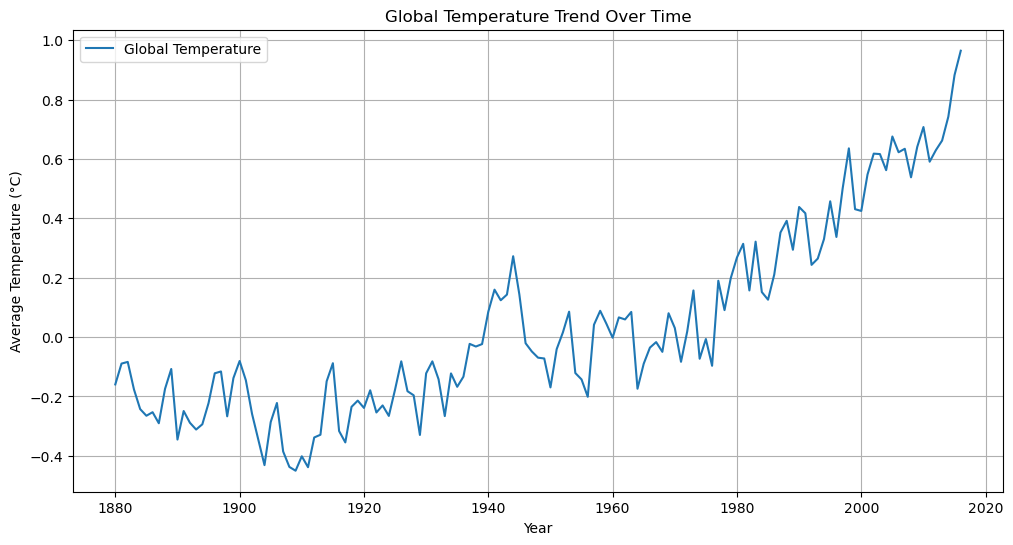

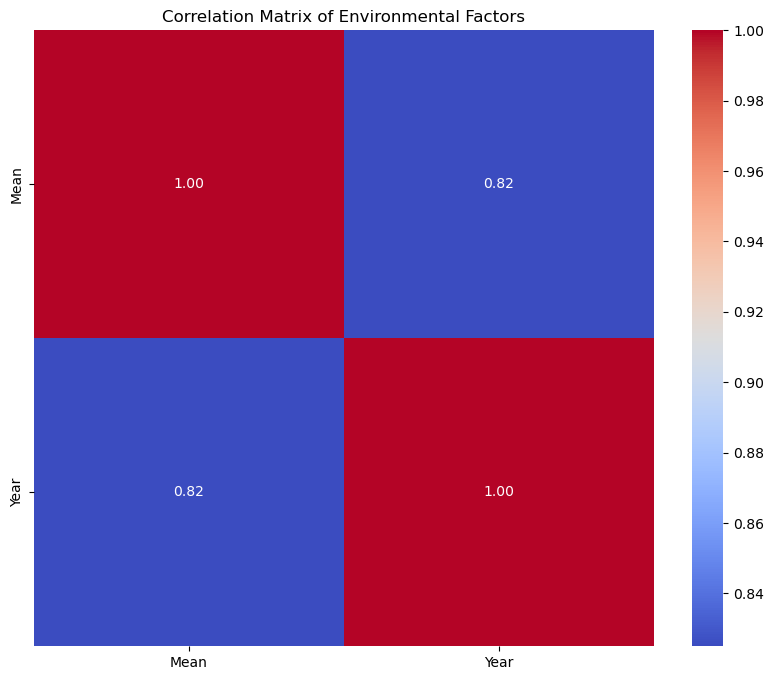

In [3]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

zip_file_path = 'Global Temperature Time Series.zip'  # Update with the correct path
extracted_folder = 'Global_Temperature_Data/'  # Folder to extract the files

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

csv_file_path = extracted_folder + 'monthly_csv.csv'  # Path to the CSV file
temperature_data = pd.read_csv(csv_file_path)

# Inspect the data
print("First few rows of the dataset:")
print(temperature_data.head())

# Print the column names
print("\nColumns in the dataset:")
print(temperature_data.columns)

# Check for missing values in the dataset
print("\nMissing values in the dataset:")
print(temperature_data.isnull().sum())

# Extract Year from the 'Date' column
# Convert 'Date' column to datetime format
temperature_data['Date'] = pd.to_datetime(temperature_data['Date'])

# Extract the year from the 'Date' column
temperature_data['Year'] = temperature_data['Date'].dt.year

# Basic data summary
print("\nData Summary:")
print(temperature_data.describe())

# Visualize the temperature trend over time
# Plot the global temperature trend by year
plt.figure(figsize=(12, 6))
plt.plot(temperature_data.groupby('Year')['Mean'].mean(), label='Global Temperature')
plt.title('Global Temperature Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Exclude non-numeric columns for correlation analysis
numeric_data = temperature_data.select_dtypes(include=[np.number])

# Visualize the correlation matrix of numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Environmental Factors')
plt.show()
